In [133]:
import pandas as pd
import matplotlib.cm as cm

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1">Loading Data</a></span><ul class="toc-item"><li><span><a href="#Minor-Data-Manipulation" data-toc-modified-id="Minor-Data-Manipulation-1.1">Minor Data Manipulation</a></span></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2">Exploration</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2.1">Time Series Analysis</a></span></li><li><span><a href="#Basics" data-toc-modified-id="Basics-2.2">Basics</a></span></li></ul></li><li><span><a href="#Looking-into-Features" data-toc-modified-id="Looking-into-Features-3">Looking into Features</a></span></li></ul></div>

# Loading Data

In [20]:
items = pd.read_csv('data/items.csv')
holiday = pd.read_csv('data/holidays_events.csv')
oil = pd.read_csv('data/oil.csv')
stores = pd.read_csv('data/stores.csv')
transactions = pd.read_csv('data/transactions.csv')
train_set = pd.read_csv('data/train.csv')

In [49]:
transactions = pd.read_csv('data/transactions.csv')


In [21]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [22]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [23]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [24]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [25]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [31]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
1,19811,2013-01-02,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
2,100696,2013-01-04,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
3,141831,2013-01-05,25,103665,5.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
4,183815,2013-01-06,25,103665,7.0,NaN,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1


## Minor Data Manipulation

In [28]:
train = train_set.merge(items,on='item_nbr')

In [30]:
train = train.merge(stores,on='store_nbr')

# Exploration

In [15]:
items.groupby('family')['item_nbr'].count().sort_values(ascending=False)

family
GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
AUTOMOTIVE                      20
LINGERIE                        20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES    

## Time Series Analysis

In [72]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,store_nbr):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=(10,3))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
    plt.savefig('plots/time_series_analysis/{}'.format(store_nbr))
    plt.close()

In [50]:
transactions.index = pd.to_datetime(transactions.date)
transactions = transactions[['store_nbr','transactions']]

In [74]:
for store_nbr in transactions.store_nbr.unique():
    ts = transactions[transactions.store_nbr == store_nbr][['transactions']]
    test_stationarity(ts, store_nbr)

/Users/lkalina/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/Users/lkalina/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


## Basics

In [76]:
oil.index = pd.to_datetime(oil.date)

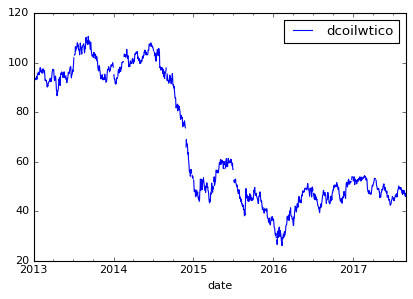

In [79]:
oil[['dcoilwtico']].plot()

In [89]:
transactions['date'] = transactions.index
transactions['year'] = transactions['date'].apply(lambda x: x.year)
transactions['month'] = transactions['date'].apply(lambda x: x.month)

In [118]:
monthly_by_store = transactions.groupby(['store_nbr',pd.TimeGrouper('M')])[['transactions']].sum()['transactions']

/Users/lkalina/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


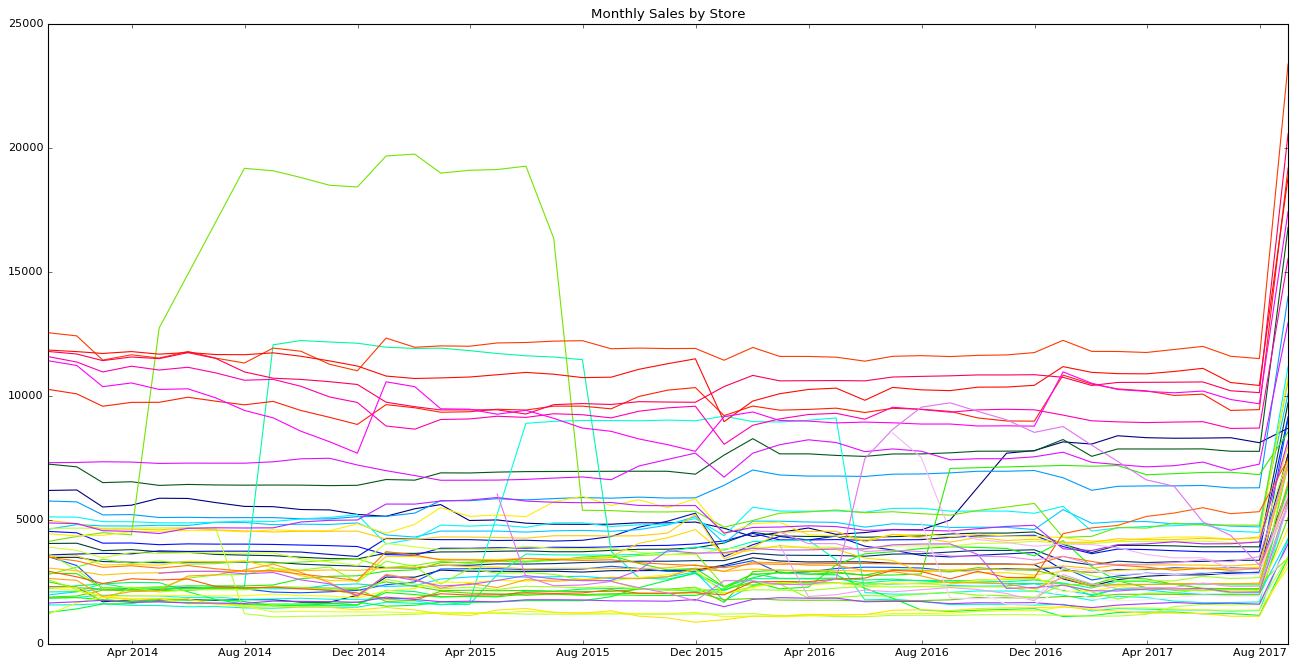

In [173]:
plt.figure(figsize=(20,10))
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,transactions.store_nbr.nunique())]
std_df = {}

for idx,store_nbr in enumerate(transactions.store_nbr.unique()):
    rolstd = pd.rolling_std(monthly_by_store.loc[store_nbr], window=12)
    std_df[store_nbr] = rolstd
    orig = plt.plot(rolstd,color=colors[idx],label='{}'.format(store_nbr))
    #orig = plt.plot(monthly_by_store.loc[store_nbr],color=colors[idx],label='{}'.format(store_nbr))

plt.title('Monthly Sales by Store')
plt.show(block=False)

In [178]:
std_df = pd.DataFrame.from_dict(std_df)

In [188]:
std_medians = std_df.median().sort_values(ascending=False)

In [186]:
# Stores with most volatile monthly sales
stores[stores.store_nbr.isin([44,46,47,45,49,48,50])]

,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14


In [201]:
stores_w_std = stores.merge(pd.DataFrame(std_medians,columns=['avg_std']),left_on='store_nbr',right_index=True)

In [203]:
stores_w_std.sort_values('avg_std',ascending=False)

,store_nbr,city,state,type,cluster,avg_std
43,44,Quito,Pichincha,A,5,11780.345090
45,46,Quito,Pichincha,A,14,10876.216043
46,47,Quito,Pichincha,A,14,10591.838981
44,45,Quito,Pichincha,A,11,9568.518280
48,49,Quito,Pichincha,A,11,9337.717741
47,48,Quito,Pichincha,A,14,9282.288994
49,50,Ambato,Tungurahua,A,14,7303.042406
2,3,Quito,Pichincha,D,8,7125.598595
7,8,Quito,Pichincha,D,8,5887.014127
24,25,Salinas,Santa Elena,D,1,5419.915151


# Looking into Features

In [ ]:
## Multilayer Perceptron
## Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html